# Homework #5

**See Canvas for the HW #5 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy in the syllabus. Please do not turn in messy work. Computational problems should be completed in this notebook (using the `R` kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

## A.1 [6 points] 
Unfortunately, the expected value of a random variable may not be defined. For example, if $\theta$ is an angle uniformly distributed in the interval $(-\pi/2,\pi/2)$, then
$X=\alpha\tan(\theta)$ has the following distribution:

$$ f(x)=\frac{\alpha}{\pi}\frac{1}{x^2+\alpha^2}, $$

where $\alpha > 0$ is a constant to ensure that $\int_{-\infty}^\infty f(x) \, dx = 1$. Show that $E[X]$ is undefined (HINT: compute $E[X]$ using a $u$-substitution and show that the integral does not converge).

## A.2 Properties of expectation
Let $X$ be a random variable such that 
- $E[X]=5$
- $sd[X]=2.5$

and let $Y$ be a random variable such that 
- $E[Y]=8$, 
- $sd[Y]=2$. 

Also, suppose that $X$ and $Y$ are not independent. In fact, $\text{Corr} [X,Y]=0.8$. 

**Compute the following.**

**A.2(a) [3 points] $E[4X+3Y+1]$**

**A.2(b) [6 points] $sd[4X+2Y+2]$**



**A.2(c) [4 points] $E[3X^2 + Y]$** (*hint: think about the shortcut formula for variance.*)

**A.2(d) [4 points] $E[8XY]$**

## A.3 [4 points] Covariance and independence

**In class, we introduced covariance and the correlation coefficient to measure how strongly two random variables are related to each other. We know that two dependent random variables can be uncorrelated, but it turns out that .if $X$ and $Y$ are independent random variables, then they are uncorrelated: $\text{Corr}[X, Y] = \text{Cov}[X, Y] = 0$.**

**Suppose that X and Y are independent random variables. Prove that $E[XY] = E[X]E[Y]$.**

## A.4 Properties of $\bar{X}$

Let $ X_{1},X_{2},...,X_{n}$ be an independent and identically distributed sample from the distribution $N( \mu , \sigma^{2})$.

**A.4(a) [4 points] Show (without integration), that $sd[\bar{X}] = \frac{\sigma}{\sqrt{n}}$**


**A.4(b) [5 points] Show that $\displaystyle\bar{X} = \mu + \frac{\sigma}{\sqrt{n}}Z$ where $Z \sim N(0,1)$.**

**A.4.(c) [7 points] [Optional for STAT 4000] Use A.4(b) to find $\displaystyle Var[\bar{X}^{2}]$. Assume that $Cov[Z, Z^2] = 0$, and that $\text{Var}[Z^2]  = 2$ (you don't have to prove these facts).**

## A.5 Let's go bowling

Frank and Sue are bowling partners, but they have different skill levels. In particular,

- Frank’s scores are normally distributed with a mean of $\mu_{F} = 110$ and a variance of $\sigma_{F}^{2} = 75$

- Sue’s scores are normally distributed with a mean of $\mu_{S} = 140$ and a variance of $ \sigma_{S}^{2} = 60$


Let $X_{F}$ be the random variable that denotes Frank’s score in a game, and $X_{S}$ the random variable that denotes Sue’s score. Answer the questions below.

**A.5(a) [6 points] It turns out that $\bar{X}$, the average of the two bowling scores, is normally distributed. What are the expected value and variance of this normal distribution? You may have an unknown covariance value in one of the values you calculate.**

**A.5(b) [3 points] Based on the information you have at this point, can we say that $Var[\bar{X}]=\frac{\sigma_{F}^{2}+\sigma_{S}^{2}}{4}$ (i.e., that the covariance of their scores is $0$)? Justify your answer.**



**A.5(c) [5 points] Assume that Frank and Ellen’s scores are independent. What is the probability that the sample average score of the group will be between $120$ and $140$ points?**



In [3]:
pnorm(2.582) - pnorm(-0.860)

[1] 0.800194

**A.5(d) [5 points] Assume that Frank and Ellen’s scores are independent. What is the probability that both players bowl a score less than $135$?**

\begin{align*}
    P(X_F \leq 135 \text{ and } X_S \leq 135) &= P(X_F \leq 135) \cdot P(X_S \leq 135) \\
    &\approx 0.25879.
\end{align*}

## B. Computational Problems

## B.1

Let $X_{1},X_{2},...,X_{500}$ be an independent and identically distributed sample from the distribution $N( \mu = 5 , \sigma^{2} = 4)$.

**B.1(a) [7 points] Construct a matrix `x` with $m = 10,000$ columns, where each column is a different sample (i.e., set of realizations) from $ X_{1},X_{2},...,X_{500}$. Then, use `colMeans()` to find the mean of each sample/column. Store these means in `xbar`. Based on lecture, what is the distribution of `xbar`? Is a histogram of `xbar` consistent with that?**

[1] 0.08944272

[1] 0.008

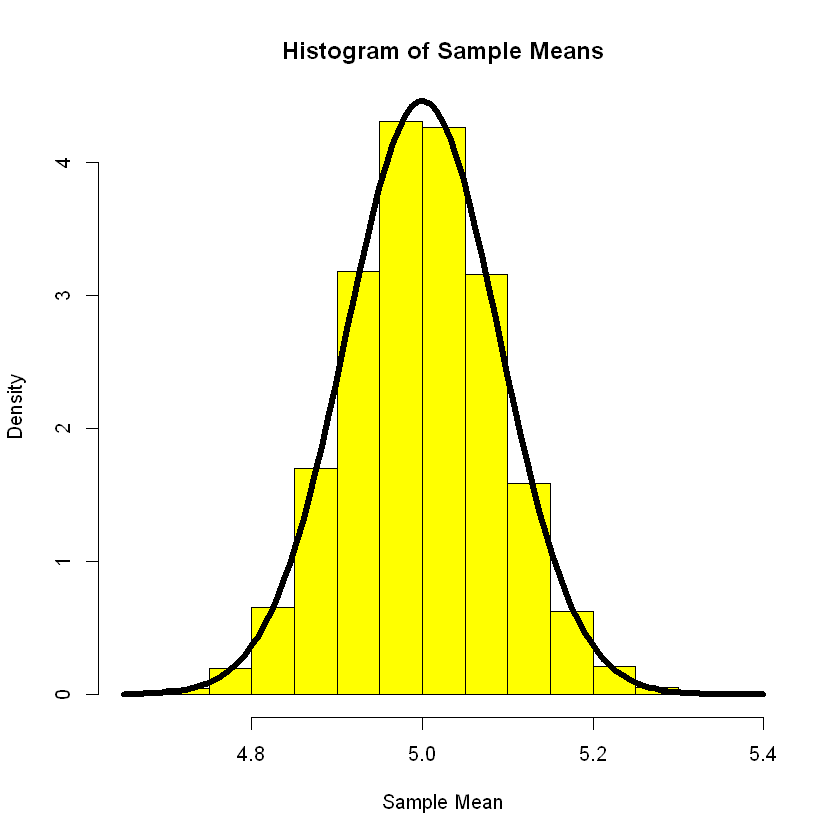

In [21]:
n = 500        
m = 10000 

set.seed(27)
x = matrix(rnorm(n * m, mean = 5, sd = 2), nrow = n, ncol = m)
x_bar = colMeans(x)

hist(x_bar, breaks = 20, probability = TRUE, 
     main = "Histogram of Sample Means",
     xlab = "Sample Mean", col = "yellow")

curve(dnorm(x, mean = 5, sd = sqrt(4 / n)), 
      col = "black", lwd = 5, add = TRUE)


sd = sqrt(4/n)
sd
var = 4/n
var

- Based on the lecture, the distribution of mean will be based on the Central limit theorem and follow a normal distribution with an approximate $\mu$ is 5 and $\frac{\sigma}{\sqrt(n)}$ is 0.089.
- The histogram shows a bell shaped normal distribution curve with mean centered around 5 and standard deviation of 0.089 (variance = 0.008).

**B.1(b) [5 points] Numerically verify the results from A.4(a)-(c). For example, for A.4(a), show that the sample standard deviation of `xbar` is *close* to $\mu$ (say within $\approx0.1$ of the true value). How could you make `xbar` closer?**

In [19]:
observ_res_mean = 5
observ_res_sd = 0.089 # sqrt(4/n)
observ_res_var = 0.008 # 4/n


mean_x_bar = mean(x_bar)
mean_x_bar
sd_x_bar = sd(x_bar)
sd_x_bar
var_x_bar = var(x_bar)
var_x_bar


[1] 4.999107

[1] 0.08904739

[1] 0.007929438

- The sample mean, standard deviation and Variance are closer or nearly equal to the observed mean, standard deviation and variance.
- To make x_bar closer we need to increase the number of samples (n).

## B. 2

**B.2(a) [4 points] Generate three random vectors of length $n = 500$ from:**

1. $X \sim \text{Beta}(3,1)$
2. $Y \sim \text{Beta}(3,1)$
3. $Z \sim \text{Beta}(2,3)$

**Present numerical (using `cor()`) and visual evidence that $X$ and $Y$ are (effectively) uncorrelated.**

[1] -0.05816828

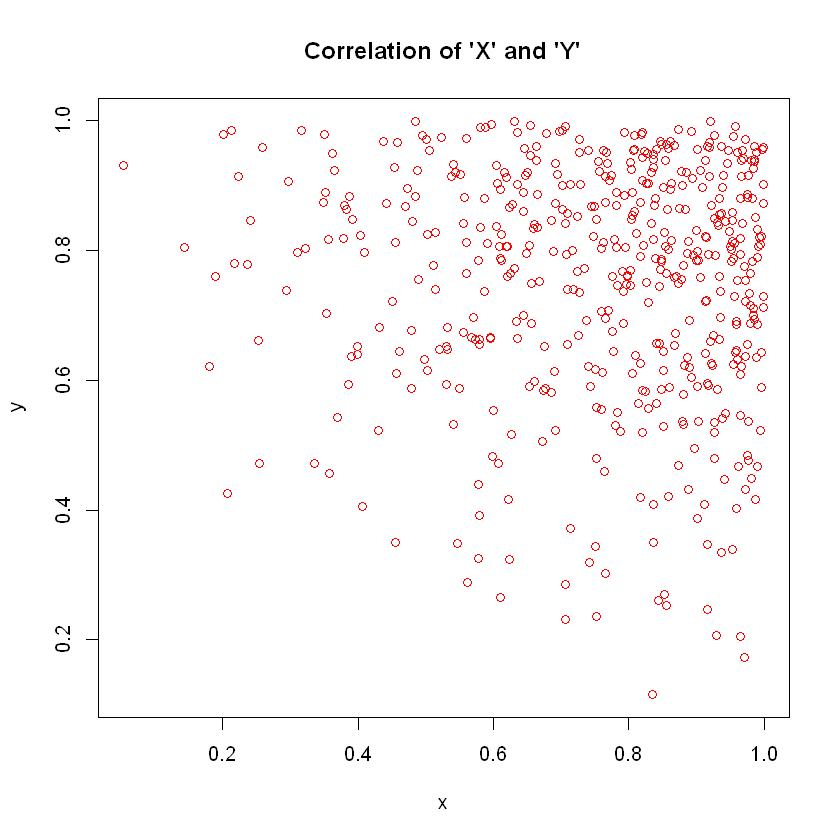

In [26]:
n = 500
set.seed(27)
x = rbeta(n,3,1)
y = rbeta(n,3,1)
z = rbeta(n,2,3)
correlation = cor(x,y)
correlation
plot(x,y, main = "Correlation of 'X' and 'Y'", col="red")
# Here X and Y are uncorrelated

**B.2(b) [4 points] Create vectors `xstar` and `ystar` by taking `x` and `y` and dividing by `z`.  Are `xstar` and `ystar` correlated? Support your claim with numerical and graphical evidence.**

[1] 0.8188542

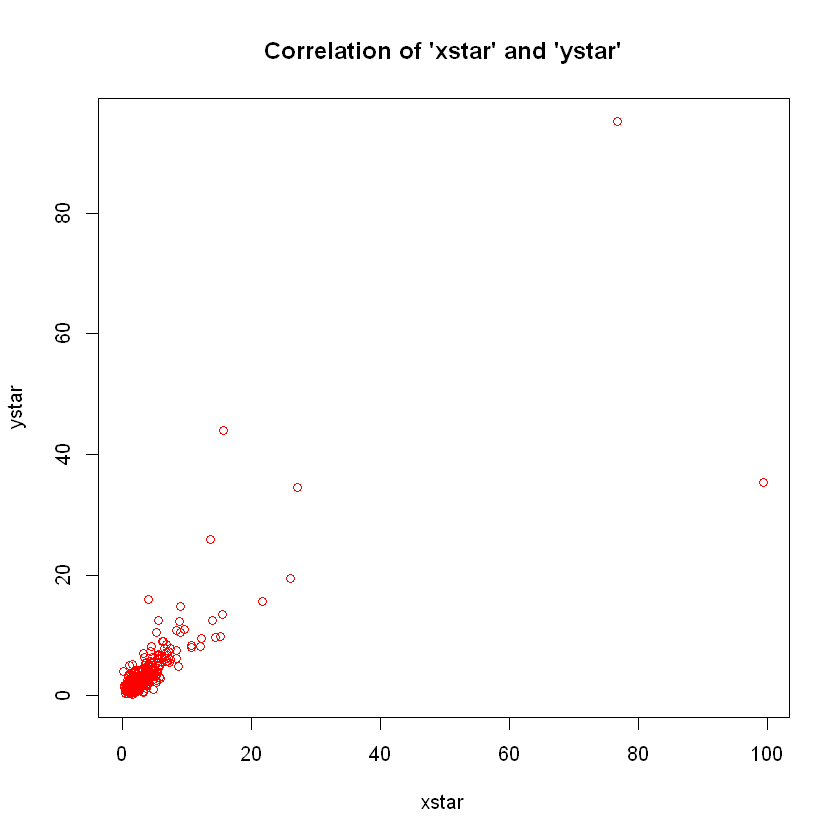

In [28]:
set.seed(27)
xstar = x/z
ystar = y/z
correlation = cor(xstar, ystar)
correlation
plot(xstar,ystar, main = "Correlation of 'xstar' and 'ystar'", col = "red")

- correlation coefficient value is 0.81 so there will be moderately strong correlation between xstar and ystar
- In the plot, it shows a linear relationship exist between xstar and y star ie. as x increases, y also increases as per the plot.

**B.2(c) [4 points] [STAT5000 Only] Store these vectors in a data frame called `df`. Load the `ggplot2` library, and use the `ggplot() + geom_point()` function to create a scatter plot of `xstar` and `ystar`, and color each point relative to the value of `z`.**

In [38]:
update.packages(ask = FALSE)


also installing the dependencies 'listenv', 'parallelly', 'bit', 'rappdirs', 'isoband', 'proxy', 'future', 'globals', 'bit64', 'memoise', 'sass', 'gargle', 'ids', 'rematch2', 'systemfonts', 'textshaping', 'lifecycle', 'ggplot2', 'e1071', 'pROC', 'blob', 'vctrs', 'shape', 'RcppEigen', 'fastmap', 'future.apply', 'progressr', 'timechange', 'commonmark', 'diagram', 'vroom', 'tzdb', 'clock', 'hardhat', 'bslib', 'fontawesome', 'jquerylib', 'farver', 'cachem', 'conflicted', 'dtplyr', 'googledrive', 'googlesheets4', 'ragg'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'parallelly' 'bit' 'rappdirs' 'isoband'
  'proxy' 'bit64' 'sass' 'systemfonts' 'textshaping' 'e1071' 'pROC'
  'vctrs' 'RcppEigen' 'fastmap' 'timechange' 'commonmark' 'vroom'
  'tzdb' 'clock' 'far

  These will not be installed


installing the source packages 'listenv', 'future', 'globals', 'memoise', 'gargle', 'ids', 'rematch2', 'lifecycle', 'ggplot2', 'blob', 'shape', 'future.apply', 'progressr', 'diagram', 'hardhat', 'bslib', 'fontawesome', 'jquerylib', 'conflicted', 'dtplyr', 'googledrive', 'googlesheets4', 'BH', 'boot', 'broom', 'callr', 'clipr', 'codetools', 'crayon', 'DBI', 'dbplyr', 'dichromat', 'evaluate', 'forcats', 'foreach', 'formatR', 'generics', 'highr', 'hms', 'htmlwidgets', 'httr', 'IRdisplay', 'IRkernel', 'iterators', 'knitr', 'labeling', 'lava', 'markdown', 'modelr', 'munsell', 'numDeriv', 'pillar', 'pkgbuild', 'pkgconfig', 'prettyunits', 'progress', 'quantmod', 'RColorBrewer', 'recipes', 'rematch', 'repr', 'reprex', 'rmarkdown', 'rstudioapi', 'rvest', 'selectr', 'shiny', 'SQUAREM', 'stringr', 'tidyverse', 'timeDate', 'tinytex', 'viridisLite', 'whisker'

Warning message in install.packages(update[instlib == l, "Package"], l, repos = repos, :
"installation of package 'memoise' had non-zero exi

In [39]:
library(ggplot2)

df = data.frame(XSTAR = xstar , YSTAR= ystar)
ggplot(df, aes(x= XSTAR, y= YSTAR, color = z)) + geom_point() +
labs(main ="Scatter plot of xstar and ystar", xlab = "xstar" , ylab = "ystar" , col="blue")

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


#### (d) [4 points] [STAT5000 Only] Interpret and analyze the results from the previous part. What practical lessons can you learn from this example?

## B.3 The Central Limit Theorem revisited

The code `rf(n, 2, 3)` can be used to generate $n$ random numbers from an ["$F$-distribution"](https://en.wikipedia.org/wiki/F-distribution) with parameters `2` and `3` (don't worry to much about what the $F$-distribution is or models at this point; it's just a probability distribution!). 

**B.3(a) [5 points] Construct a matrix `x` with $m = 10,000$ columns, where each column is a different sample of size $n = 25$ from the $F$-distribution with parameters `2` and `3`. Construct a histogram of one of the columns. What can you say about the shape of this distribution?**


**B.3(b) [5 points] Use `colMeans()` to find the mean of each sample (each column of `x`). Store these means in `xbar`. Construct a histogram of `xbar`. Does the histogram look normal (or approximately normal)? If yes, why? If no, why not?**